In [38]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# loading the model 

model = tf.keras.models.load_model('my_model.keras')

In [40]:
# Function to preprocess the image

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Rescale pixel values to [0, 1]
    return image


In [41]:
# Function to make predictions

def predict_class(image_path):
    
    image = preprocess_image(image_path)
    
    # Convert the image to a batch of size 1 (since we are predicting a single image)
    image_batch = np.expand_dims(image, axis=0)
    
    # Make predictions on the image
    predictions = model.predict(image_batch)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index


In [43]:

# Test the model on a new image

new_image_path = r'H:\CSI\Data Set\Unprocessed\test\four.jpeg'

predicted_class_index = predict_class(new_image_path)


1/1 [==============================] - 2s 2s/step


In [44]:
class_names = ['Bicycle', 'Bike', 'Car', 'Cart', 'Truck']

predicted_class_name = class_names[predicted_class_index]

print("Predicted Class:", predicted_class_name)

Predicted Class: Cart


In [55]:
test_data_dir = r'H:\CSI\Data Set\Unprocessed\test'

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False to maintain order
)

Found 6 images belonging to 5 classes.


1/1 [==============================] - 0s 350ms/step


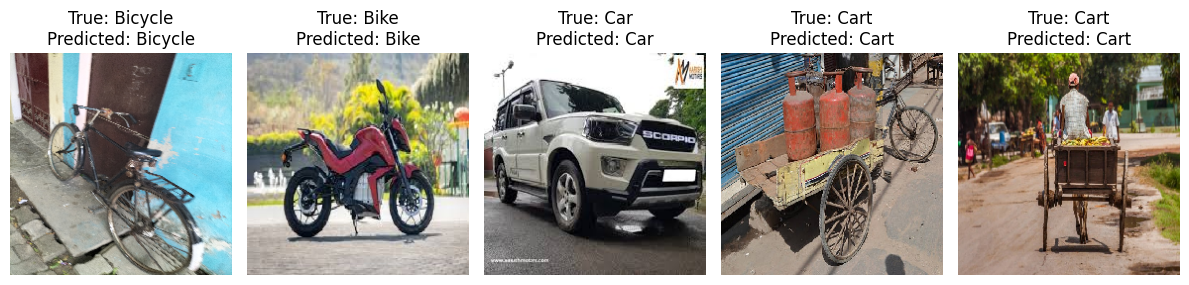

In [56]:
test_images, test_labels = test_generator.next()

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the sample images with their true and predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'True: {class_names[test_labels[i].argmax()]}\nPredicted: {class_names[predicted_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
